In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Read the data (assuming you have already mounted your Google Drive and set the file path)
file_path = '/content/drive/My Drive/training_data_v2.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()


,Index,Category,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_759,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767,dim_768
0,0,0,-0.882278,-0.647234,0.050173,-0.448188,-0.175582,0.125284,-0.335781,-0.396106,...,0.568470,-0.326577,0.026089,-0.407658,-0.162295,-0.121949,-0.386429,0.135763,0.516049,0.731324
1,1,0,-0.702665,-0.462591,0.162085,-0.029182,-0.280842,0.047459,0.109864,-0.540210,...,0.249440,-0.422917,0.033820,-0.226271,-0.324386,-0.036914,-0.588373,-0.344278,0.329853,0.195897
2,2,0,-0.327257,-0.397209,0.035037,-0.064671,-0.435734,0.535525,0.134867,-0.213102,...,0.710835,-0.191510,-0.068998,-0.262279,-0.214397,0.095195,-0.503536,0.142249,0.206015,0.182094
3,3,0,-0.793734,-0.470964,-0.278644,-0.292047,-0.565868,0.546791,0.604674,-0.069190,...,0.387789,-0.596448,-0.291108,-0.320205,-0.362207,0.179917,-0.600026,-0.200465,0.776508,-0.155819
4,4,0,-0.272840,-0.556684,0.001737,-0.229906,-0.495732,0.176596,-0.141926,-0.352247,...,0.660122,-0.534026,0.347033,-0.279629,-0.397189,0.226515,-0.547098,0.431136,0.102714,0.422797


Training both Mean shift and DBSCAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of clusters (DBSCAN): 1


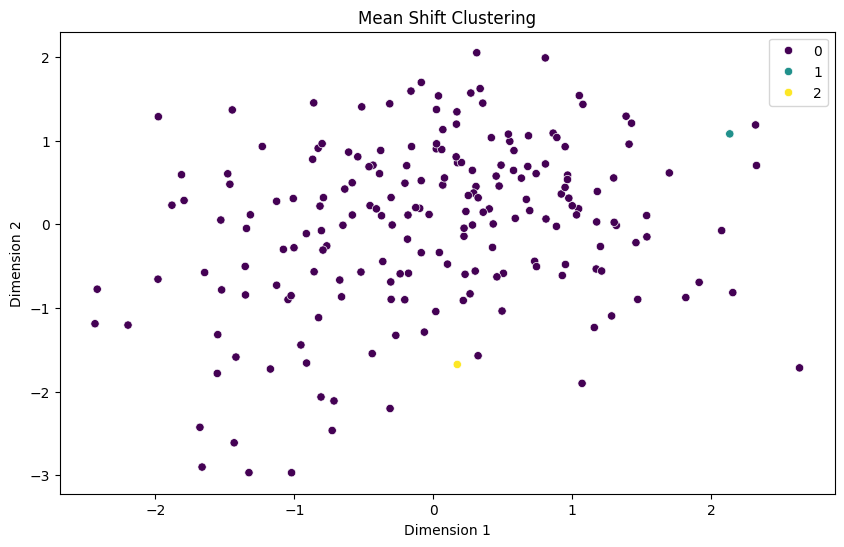

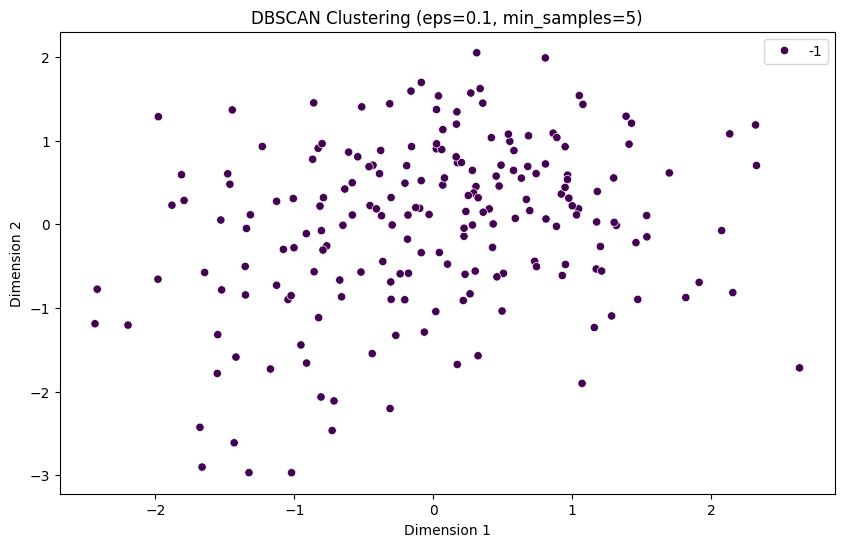

Silhouette Score for Mean Shift: 0.1664320652708458
DBSCAN resulted in a single cluster or only noise. Silhouette Score cannot be computed.


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift, DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the data
file_path = '/content/drive/My Drive/training_data_v2.xlsx'
df = pd.read_excel(file_path)

# Prepare the data for clustering
X = df.drop(columns=['Index', 'Category'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mean Shift Clustering
mean_shift = MeanShift()
mean_shift.fit(X_scaled)
labels_mean_shift = mean_shift.labels_

# DBSCAN Clustering with specified parameters
eps_value = 0.1
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan.fit(X_scaled)
labels_dbscan = dbscan.labels_

# Check the unique clusters for DBSCAN
unique_clusters_dbscan = np.unique(labels_dbscan)
print(f"Number of clusters (DBSCAN): {len(unique_clusters_dbscan)}")

# Add the cluster labels to the original dataframe
df['Cluster_MeanShift'] = labels_mean_shift
df['Cluster_DBSCAN'] = labels_dbscan

# Visualize Mean Shift Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_mean_shift, palette='viridis', legend='full')
plt.title('Mean Shift Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_dbscan, palette='viridis', legend='full')
plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Compute silhouette scores if there are multiple clusters
if len(np.unique(labels_mean_shift)) > 1:
    silhouette_mean_shift = silhouette_score(X_scaled, labels_mean_shift)
    print(f'Silhouette Score for Mean Shift: {silhouette_mean_shift}')
else:
    print('Mean Shift resulted in a single cluster. Silhouette Score cannot be computed.')

if len(unique_clusters_dbscan) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN resulted in a single cluster or only noise. Silhouette Score cannot be computed.')


Futher analysis on DBSCAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Number of clusters (DBSCAN): 1


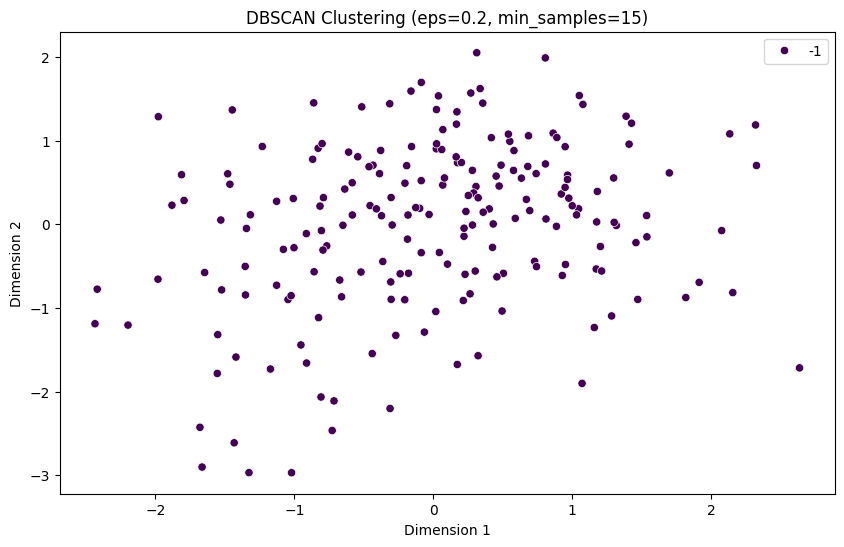

DBSCAN resulted in a single cluster or only noise. Adjusting parameters...
Trying eps=0.1, min_samples=5: Number of clusters=1
Trying eps=0.1, min_samples=10: Number of clusters=1
Trying eps=0.1, min_samples=15: Number of clusters=1
Trying eps=0.2, min_samples=5: Number of clusters=1
Trying eps=0.2, min_samples=10: Number of clusters=1
Trying eps=0.2, min_samples=15: Number of clusters=1
Trying eps=0.3, min_samples=5: Number of clusters=1
Trying eps=0.3, min_samples=10: Number of clusters=1
Trying eps=0.3, min_samples=15: Number of clusters=1
Trying eps=0.4, min_samples=5: Number of clusters=1
Trying eps=0.4, min_samples=10: Number of clusters=1
Trying eps=0.4, min_samples=15: Number of clusters=1
Trying eps=0.5, min_samples=5: Number of clusters=1
Trying eps=0.5, min_samples=10: Number of clusters=1
Trying eps=0.5, min_samples=15: Number of clusters=1
DBSCAN still resulted in a single cluster or only noise. Silhouette Score cannot be computed.


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the data
file_path = '/content/drive/My Drive/training_data_v2.xlsx'
df = pd.read_excel(file_path)

# Prepare the data for clustering
X = df.drop(columns=['Index', 'Category'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN Clustering with specified parameters
eps_value = 0.2
min_samples_value = 15

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan.fit(X_scaled)
labels_dbscan = dbscan.labels_

# Check the unique clusters for DBSCAN
unique_clusters_dbscan = np.unique(labels_dbscan)
print(f"Number of clusters (DBSCAN): {len(unique_clusters_dbscan)}")

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_dbscan, palette='viridis', legend='full')
plt.title(f'DBSCAN Clustering (eps={eps_value}, min_samples={min_samples_value})')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# If DBSCAN resulted in a single cluster or only noise, adjust parameters
if len(unique_clusters_dbscan) <= 1:
    print('DBSCAN resulted in a single cluster or only noise. Adjusting parameters...')

    # Trying a range of parameters
    eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
    min_samples_values = [5, 10, 15]

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X_scaled)
            labels_dbscan = dbscan.labels_
            unique_clusters_dbscan = np.unique(labels_dbscan)

            print(f'Trying eps={eps}, min_samples={min_samples}: Number of clusters={len(unique_clusters_dbscan)}')

            if len(unique_clusters_dbscan) > 1:
                plt.figure(figsize=(10, 6))
                sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_dbscan, palette='viridis', legend='full')
                plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
                plt.xlabel('Dimension 1')
                plt.ylabel('Dimension 2')
                plt.show()
                break
        if len(unique_clusters_dbscan) > 1:
            break

# Compute silhouette scores if there are multiple clusters
if len(np.unique(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN still resulted in a single cluster or only noise. Silhouette Score cannot be computed.')
